In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/noshowappointments.csv")


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.columns = [x.lower().replace("-", "_") for x in df.columns]

In [ ]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [ ]:
df["waiting_days"] = df["appointmentday"].dt.dayofyear - df["scheduledday"].dt.dayofyear

In [ ]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


# 1. Rel Plot

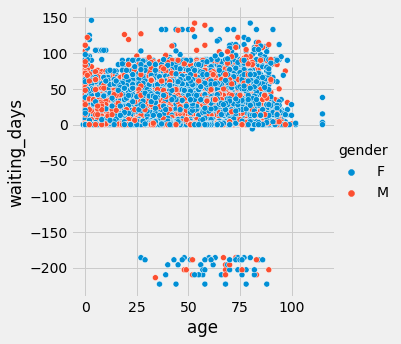

In [ ]:
sns.relplot(data=df, x="age", y="waiting_days", hue="gender")

In [ ]:
# Remove days which are negative

In [ ]:
df.drop(df[df.waiting_days<0].index, axis=0, inplace=True)

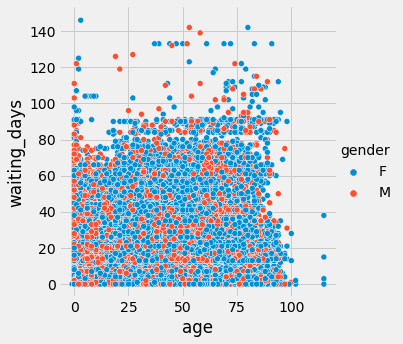

In [ ]:
sns.relplot(data=df, x="age", y="waiting_days", hue="gender")

# 2. Scatter Plot

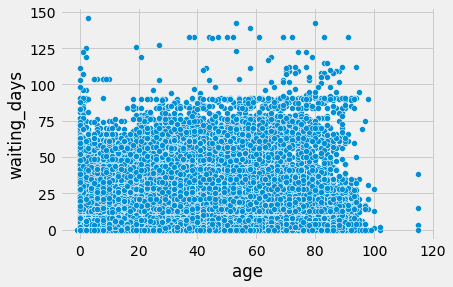

In [ ]:
sns.scatterplot(data=df, x="age", y="waiting_days")

# 3. Line Plot

In [ ]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [ ]:
df = df[df.age >= 0]
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [ ]:
age_vc = df.age.value_counts().sort_index()
print(age_vc.index)
line_plot_data = pd.DataFrame(data=list(zip(age_vc.index, age_vc.values)), columns=["Age", "Counts"])
line_plot_data

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
           dtype='int64', length=103)


,Age,Counts
0,0,3539
1,1,2273
2,2,1618
3,3,1513
4,4,1299
...,...,...
98,98,6
99,99,1
100,100,4
101,102,2


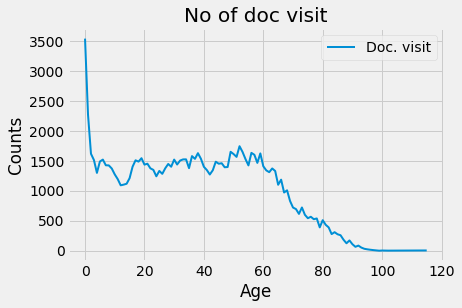

In [ ]:
sns.lineplot(x="Age", y="Counts", data=line_plot_data, lw=2)
plt.legend(["Doc. visit"])
plt.title("No of doc visit")
plt.show()

# 4. Bar Plot

In [ ]:
df["no_show_binary"] = np.where(df.no_show=='Yes', 1, 0)

In [ ]:
df["day"] = df.scheduledday.dt.day_name()

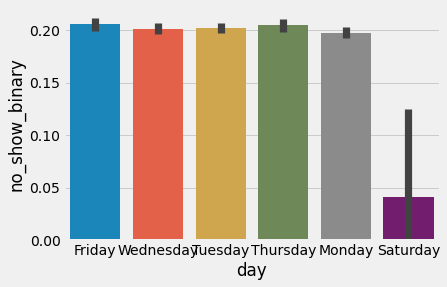

In [ ]:
sns.barplot(x="day", y="no_show_binary", data=df, dodge=False)

Text(0.5, 1.0, 'People Showed based on Days')

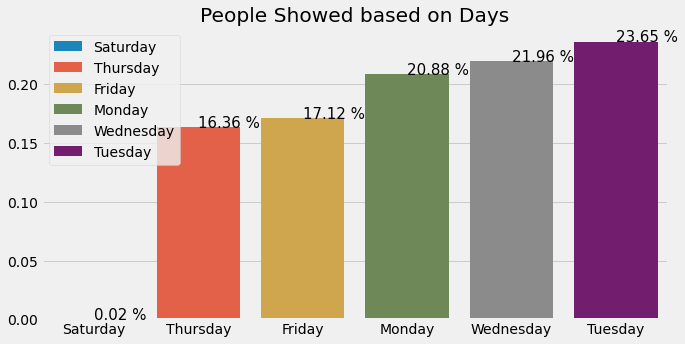

In [ ]:
d = df.day.value_counts(normalize=True).sort_values()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=d.index.tolist(), y=d.values, hue=d.index.tolist(), dodge=False)
ctr = 0
for day,value in d.items():
  ax.text(x=ctr , y =value , s=f"{round(float(value)*100, 2)} %" , fontdict=dict(fontsize=15))
  ctr += 1
plt.title("People Showed based on Days")

Text(0, 0.5, 'Percentage of Shown People')

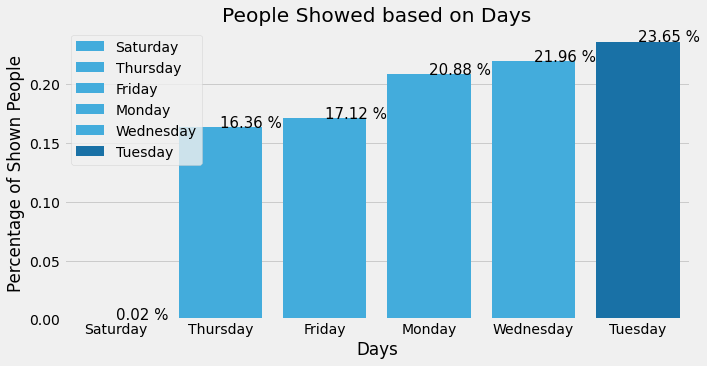

In [ ]:
d = df.day.value_counts(normalize=True).sort_values()
plt.figure(figsize=(10,5))
clrs = ['#29b6f6' if (x < max(d.values)) else  '#0277bd'  for x in d.values ]
ax = sns.barplot(x=d.index.tolist(), y=d.values, hue=d.index.tolist(), dodge=False, palette=clrs)
ctr = 0
for day,value in d.items():
  ax.text(x=ctr , y =value , s=f"{round(float(value)*100, 2)} %" , fontdict=dict(fontsize=15))
  ctr += 1
plt.title("People Showed based on Days")
plt.xlabel("Days")
plt.ylabel("Percentage of Shown People")

# 5. Box Plot

In [ ]:
df.scheduledday = pd.to_datetime(df.scheduledday)

In [ ]:
df["day"] = df.scheduledday.dt.day_name()

In [ ]:
df["day"]

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
            ...    
110522      Tuesday
110523      Tuesday
110524    Wednesday
110525    Wednesday
110526    Wednesday
Name: day, Length: 110459, dtype: object

Text(0.5, 1.0, 'AGE Distribution in Each Day')

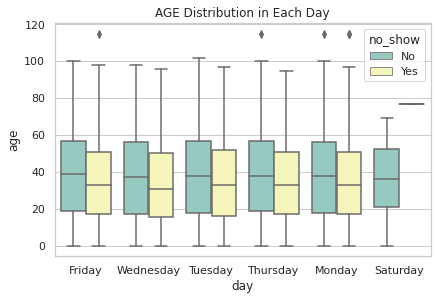

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="day", y="age", hue="no_show", data=df, palette="Set3")
plt.title("AGE Distribution in Each Day")

# 6. Violine Plot

Text(0.5, 1.0, 'Age Distribution')

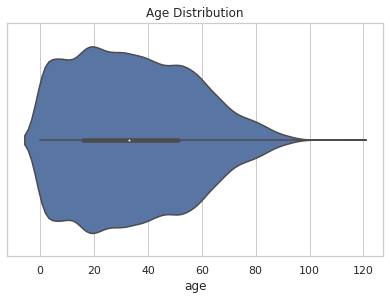

In [ ]:
import seaborn as sns
sns.violinplot(x=df[df.no_show=="Yes"].age)
plt.title("Age Distribution")

In [ ]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,no_show_binary,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,Friday


In [ ]:
df["day"] = df.scheduledday.dt.day_name()

In [ ]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,no_show_binary,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,Friday


Text(0.5, 1.0, 'Age Distribution with Day')

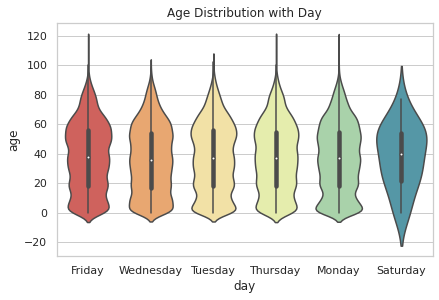

In [ ]:
sns.violinplot(x="day", y="age", data=df, palette="Spectral")
plt.title("Age Distribution with Day")

Text(0.5, 1.0, 'Age Distribution with Day')

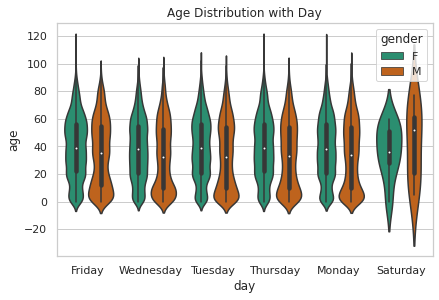

In [ ]:

sns.violinplot(x="day", y="age", data=df, palette="Dark2", hue="gender")
plt.title("Age Distribution with Day")

Text(0.5, 1.0, 'Age Distribution with Day')

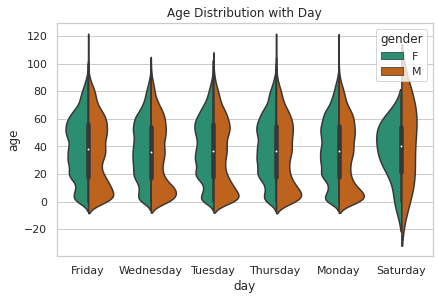

In [ ]:

sns.violinplot(x="day", y="age", data=df, palette="Dark2", hue="gender", split=True)
plt.title("Age Distribution with Day")

# 7. Dist Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


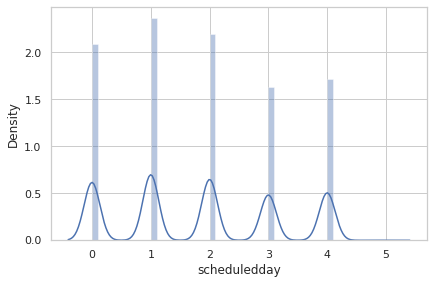

In [ ]:
sns.distplot(df.scheduledday.dt.weekday)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


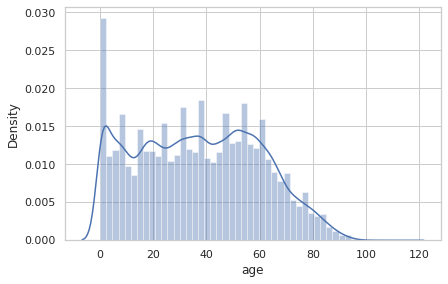

In [ ]:
sns.distplot(df.age)

# 8. Pair Plot

In [ ]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show',
       'waiting_days', 'no_show_binary', 'day'],
      dtype='object')

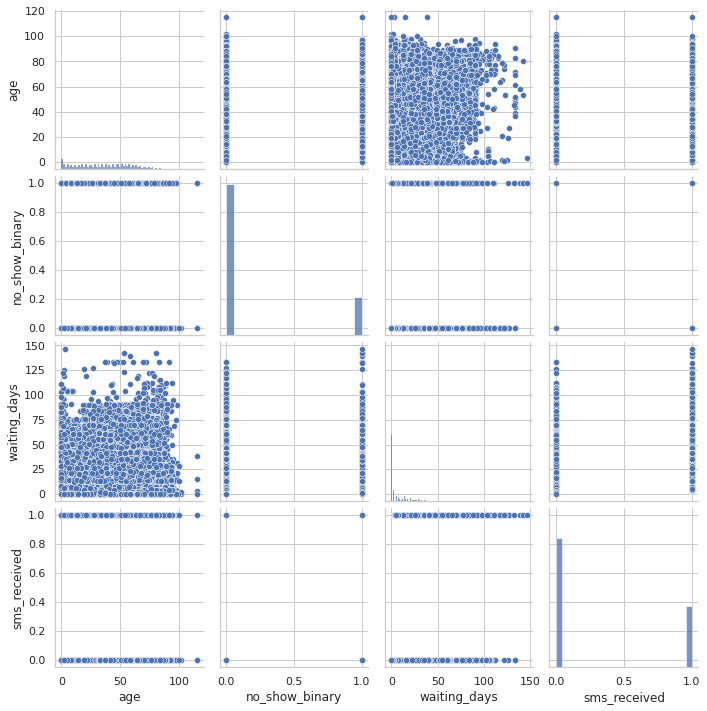

In [ ]:
sns.pairplot(df[["age","no_show_binary", "waiting_days", "sms_received"]])

# 9. Regplot

In [ ]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,no_show_binary,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,Friday


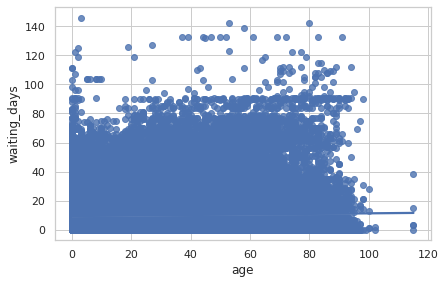

In [ ]:
sns.regplot(x="age", y="waiting_days", data=df)

# 10. Heatmap

In [ ]:
hm = df[['no_show_binary', 'sms_received', 'waiting_days']].corr()

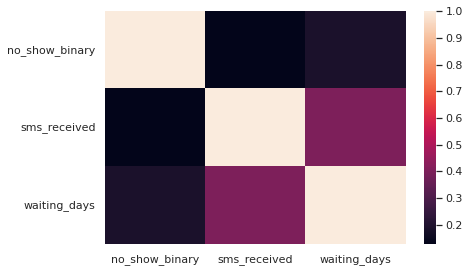

In [ ]:
sns.heatmap(hm)